## 1. Business Understanding

## 2. Data Understanding
##### Step 1: Data Collection and Initial Exploration

In [1]:
import pandas as pd

# Load the dataset
file_path = 'data/phishing_dataset/phishing_dataset.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows of the Dataset:")
display(df.head())

print("\nData Types and Null Values:")
display(df.info())


Dataset Shape: (504983, 8)

First 5 Rows of the Dataset:


,url,target,url_length,hostname_length,tld,num_dots,has_at_symbol,https
0,https://docs.google.com/presentation/d/e/2PACX...,Phishing,178,15,com,3,False,True
1,https://btttelecommunniccatiion.weeblysite.com/,Phishing,47,38,com,2,False,True
2,https://kq0hgp.webwave.dev/,Phishing,27,18,dev,2,False,True
3,https://brittishtele1bt-69836.getresponsesite....,Phishing,50,41,com,2,False,True
4,https://bt-internet-105056.weeblysite.com/,Phishing,42,33,com,2,False,True



Data Types and Null Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504983 entries, 0 to 504982
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   url              504983 non-null  object
 1   target           504983 non-null  object
 2   url_length       504983 non-null  int64 
 3   hostname_length  504983 non-null  int64 
 4   tld              504755 non-null  object
 5   num_dots         504983 non-null  int64 
 6   has_at_symbol    504983 non-null  bool  
 7   https            504983 non-null  bool  
dtypes: bool(2), int64(3), object(3)
memory usage: 24.1+ MB


None

> **Key Insights:**
> There are 504,983 rows and 8 columns.
>> **Column Definitions**
>> - ***url:*** Contains URLs, likely representing the samples. This column is of type object.
>> - ***target:*** Appears to be the target variable, with entries indicating whether each URL is phishing or legitimate. This column is also of type object.
>> - ***url_length and hostname_length:*** Numerical columns (int64) likely representing the length of the full URL and the hostname, respectively.
>> - ***tld:*** Represents the top-level domain of each URL, such as ".com" or ".org". This column has a small number of missing values (504,755 non-null out of 504,983).
>> - ***num_dots:*** An integer feature that likely counts the number of dots (.) in the URL.
>> - ***has_at_symbol and https:*** Boolean columns indicating whether the URL contains an "@" symbol and whether it uses HTTPS, respectively.

##### Step 2: Checking for Missing Values, Unique Values, and Statistical Summaries

In [2]:
# Count missing values in each column
print("Missing Values per Column:")
missing_values = df.isnull().sum()
display(missing_values)

# Count unique values in each column
print("\nUnique Values per Column:")
unique_values = df.nunique()
display(unique_values)

# Statistical summary of numerical columns
print("\nStatistical Summary for Numerical Columns:")
display(df.describe())


Missing Values per Column:


url                  0
target               0
url_length           0
hostname_length      0
tld                228
num_dots             0
has_at_symbol        0
https                0
dtype: int64


Unique Values per Column:


url                504933
target                  3
url_length            714
hostname_length       148
tld                  1550
num_dots               34
has_at_symbol           2
https                   2
dtype: int64


Statistical Summary for Numerical Columns:


,url_length,hostname_length,num_dots
count,504983.000000,504983.000000,504983.000000
mean,60.923625,20.030528,2.582043
std,66.307073,8.636628,1.166853
min,8.000000,0.000000,0.000000
25%,39.000000,15.000000,2.000000
50%,52.000000,19.000000,2.000000
75%,71.000000,23.000000,3.000000
max,25523.000000,240.000000,40.000000


> **Key Insights**
> - The `tld`(top-level-domain) column has 228 missing values
> - The dataset is diverse because `url` column has 504,933 unique URLs
> - In the `url_length` column the minimum characters are 8 and the maximum characters are 25,523, indicating that some entries have very long URLs.

## 3. Data Preparation
##### Step 1: Data Preprocessing

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Handle missing values - fill with a placeholder or drop if appropriate
df['tld'].fillna('unknown', inplace=True)

# Encode the target variable
label_encoder = LabelEncoder()
df['target'] = label_encoder.fit_transform(df['target'])

# Split features and target variable
X = df.drop(columns=['target'])
y = df['target']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_15680\1026951787.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tld'].fillna('unknown', inplace=True)


Training set shape: (403986, 7)
Test set shape: (100997, 7)


> **Key Insights:**
> - Training and Test Set Shapes:
>> - The training set contains 403,986 samples and 7 features.
>> - The test set contains 100,997 samples and 7 features.

##### Step 2: Exploratory Data Analysis (EDA)

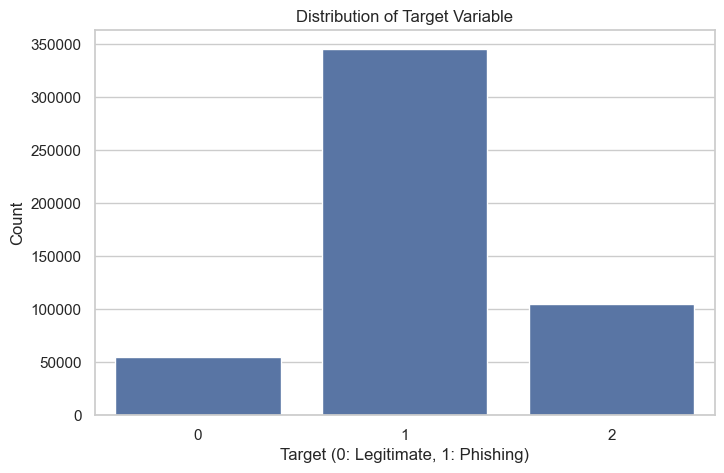


Count of Target Classes:
target
1    345738
2    104438
0     54807
Name: count, dtype: int64

Summary Statistics for URL Length by Target Variable:
           count       mean         std   min   25%   50%   75%      max
target                                                                  
0        54807.0  66.556480  169.940693  14.0  33.0  45.0  84.0  25523.0
1       345738.0  58.481443   25.532656  15.0  42.0  53.0  70.0    651.0
2       104438.0  66.052366   62.310706   8.0  35.0  50.0  73.0   2314.0


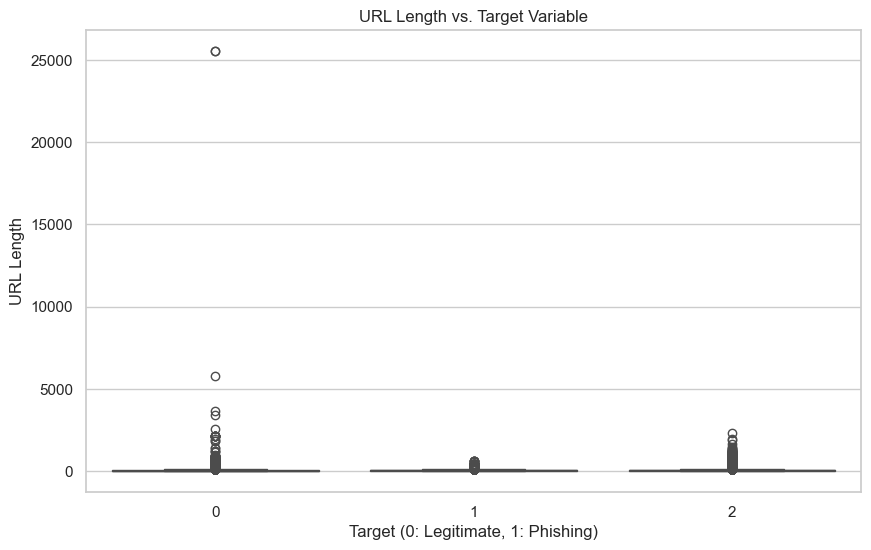


Summary Statistics for Hostname Length by Target Variable:
           count       mean        std  min   25%   50%   75%    max
target                                                              
0        54807.0  26.069097  16.697832  4.0  15.0  21.0  30.0  102.0
1       345738.0  19.617858   5.854038  5.0  15.0  19.0  23.0   75.0
2       104438.0  18.227733   8.829152  0.0  13.0  17.0  21.0  240.0


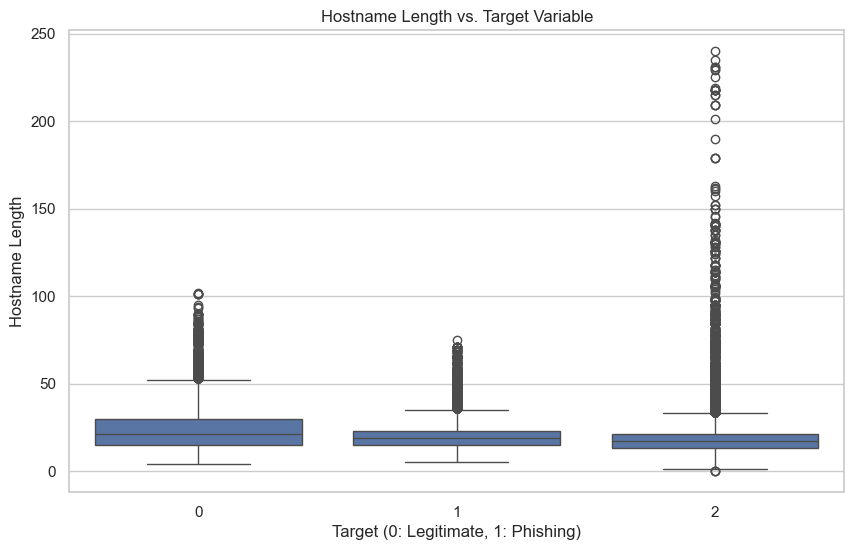

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution of the target variable
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='target')
plt.title('Distribution of Target Variable')
plt.xlabel('Target (0: Legitimate, 1: Phishing)')
plt.ylabel('Count')
plt.show()

# Print the count of each class in the target variable
target_counts = df['target'].value_counts()
print("\nCount of Target Classes:")
print(target_counts)

# 2. Summary statistics for URL length grouped by target variable
url_length_summary = df.groupby('target')['url_length'].describe()
print("\nSummary Statistics for URL Length by Target Variable:")
print(url_length_summary)

# Relationship between URL length and target
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='target', y='url_length')
plt.title('URL Length vs. Target Variable')
plt.xlabel('Target (0: Legitimate, 1: Phishing)')
plt.ylabel('URL Length')
plt.show()

# 3. Summary statistics for hostname length grouped by target variable
hostname_length_summary = df.groupby('target')['hostname_length'].describe()
print("\nSummary Statistics for Hostname Length by Target Variable:")
print(hostname_length_summary)

# Relationship between hostname length and target
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='target', y='hostname_length')
plt.title('Hostname Length vs. Target Variable')
plt.xlabel('Target (0: Legitimate, 1: Phishing)')
plt.ylabel('Hostname Length')
plt.show()



> **Key Insights:** 
> - There are  ***345,738*** instances of phishing URLs, ***54,807*** instances of legitimate URLs & ***104,438*** instances of unknown category.
> - The mean hostname length for legitimate URLs `0` is higher than that of phishing URLs `1`.
> - The standard deviation is also larger for legitimate URLs, indicating more variability in their lengths.